In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
df_base = pd.read_csv('kc_house_data.csv')
df_base.reset_index()
df_base.head(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


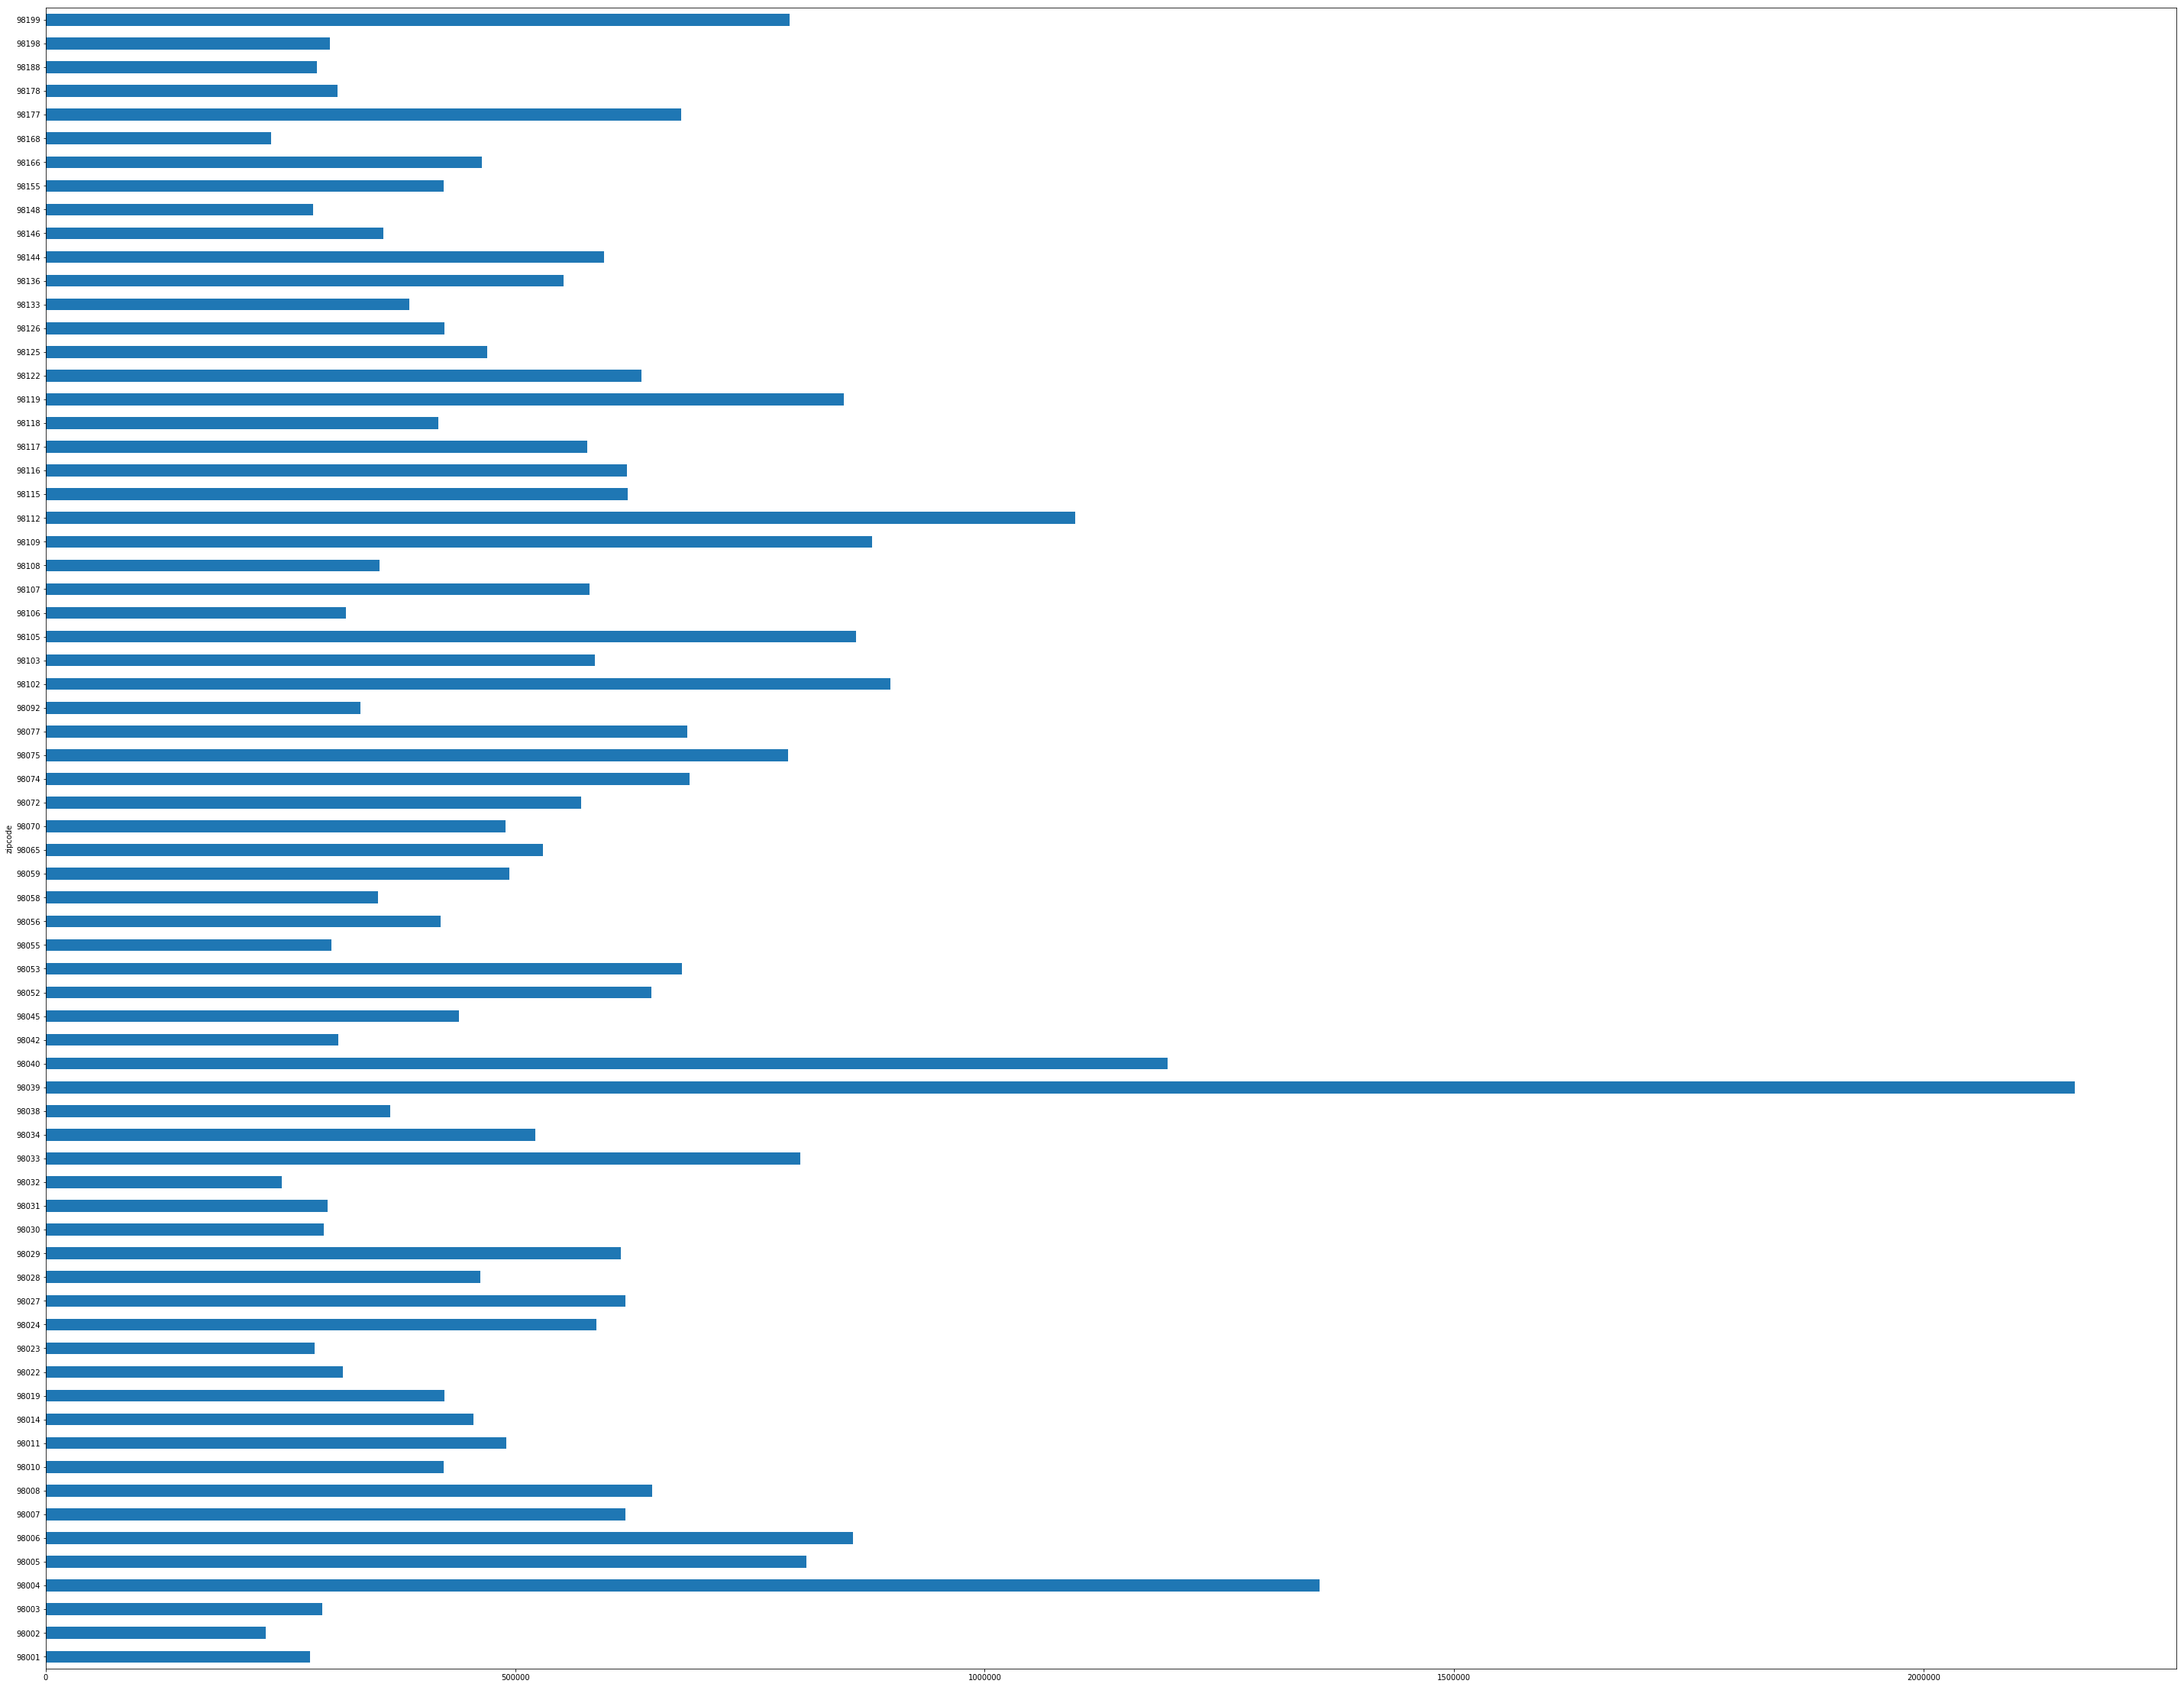

In [5]:
df_base.groupby('zipcode')['price'].mean().plot(kind = 'barh', x = 'price', figsize = (50,40))

In [6]:
df_base ['price_per_sqft_living'] = round(df_base ['price'] / df_base ['bedrooms'])

In [7]:
df_base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,73967.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,179333.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,90000.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,151000.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,170000.0


In [8]:
df_base = df_base.fillna(method = 'ffill')
df_base.isna().sum()


id                       0
date                     0
price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               1
view                     0
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
price_per_sqft_living    0
dtype: int64

In [9]:
# cols = df_base.columns.drop('id')
# df_base = df_base[cols] = df_base[cols].apply(pd.to_numeric, errors='coerce')

In [10]:
df1 = df_base [['price','bedrooms','bathrooms','sqft_living']]
df1.head()

,price,bedrooms,bathrooms,sqft_living
0,221900.0,3,1.00,1180
1,538000.0,3,2.25,2570
2,180000.0,2,1.00,770
3,604000.0,4,3.00,1960
4,510000.0,3,2.00,1680


In [11]:
corr = df_base.corr().round(2)
corr.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.01,0.01,-0.02,0.01,-0.01,0.02,-0.01,-0.01,-0.00,0.02,-0.00,-0.14,-0.01
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.26,0.39,0.04,0.67,0.61,0.05,0.11,-0.05,0.31,0.02,0.59,0.08,0.85
bedrooms,0.00,0.31,1.00,0.51,0.58,0.03,0.18,-0.00,0.08,0.03,0.36,0.48,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03,-0.13
bathrooms,0.01,0.53,0.51,1.00,0.76,0.09,0.50,0.06,0.19,-0.13,0.67,0.69,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,0.29
sqft_living,-0.01,0.70,0.58,0.76,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.32,0.05,-0.20,0.05,0.24,0.76,0.18,0.44


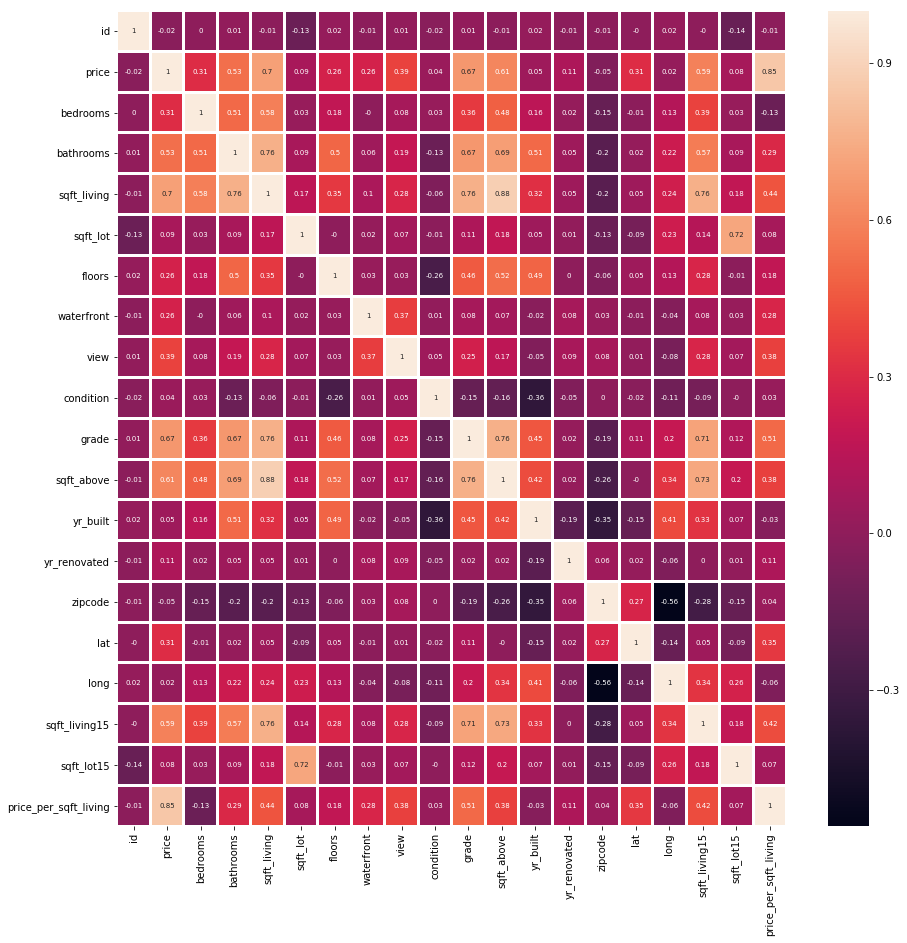

In [12]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data = corr, annot = True, annot_kws = {"size": 7}, linewidth = 2)


In [19]:
import statsmodels.api as sm
X = df_base ['sqft_living']
Y = df_base ['price']

In [20]:
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(Y,X)

#Learning
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.49
const         -43988.8922
sqft_living      280.8630
dtype: float64


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:29:19   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""